In [101]:
import pandas
from keras.models import Sequential, Model
from keras.layers.core import Dense, Activation

# load dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [102]:
# Reads .csv file as Numpy Ndarray
dataset = pd.read_csv("/content/BreasCancer.csv") # Reads .csv file as DataFrame.

#dataset = pd.read_csv("/content/BreasCancer.csv", header=None).values

In [103]:
#print Datatype and the sape of the data
print(type(dataset))
print(dataset.shape)

<class 'pandas.core.frame.DataFrame'>
(569, 33)


In [104]:
#Because the id and diagnosis values not float, I got the following error "Cast string to float is not supported"
#Therefore: 
# I dropped id attribute
dataset = dataset.drop(columns = 'id')
# I changed diagnosis values to 1 and 0
dataset['diagnosis'] = dataset['diagnosis'].map({'B': 1, 'M': 0}).astype(int)
dataset = dataset.values
print(dataset)

[[ 0.      17.99    10.38    ...  0.4601   0.1189       nan]
 [ 0.      20.57    17.77    ...  0.275    0.08902      nan]
 [ 0.      19.69    21.25    ...  0.3613   0.08758      nan]
 ...
 [ 0.      16.6     28.08    ...  0.2218   0.0782       nan]
 [ 0.      20.6     29.33    ...  0.4087   0.124        nan]
 [ 1.       7.76    24.54    ...  0.2871   0.07039      nan]]


In [105]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
scdataset= sc.fit_transform(dataset)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:765: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:706: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


In [106]:
 #splitting the data after using StandardScaler
X_train, X_test, Y_train, Y_test = train_test_split(scdataset[:,0:8], scdataset[:,8], test_size=0.25, random_state=22)


# Last column is our target [0, 1]
#X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8], test_size=0.25, random_state=22)

print("X_train.shape: ", X_train.shape)
print("Y_train.shape: ", Y_train.shape)
print("X_test.shape: ", X_test.shape)
print("Y_test.shape: ", Y_test.shape)

X_train.shape:  (426, 8)
Y_train.shape:  (426,)
X_test.shape:  (143, 8)
Y_test.shape:  (143,)


In [107]:
my_first_nn = Sequential() # create a Sequential model

my_first_nn.add(Dense(40, input_dim=8, activation='relu')) # hidden layer
my_first_nn.add(Dense(60, input_dim=8, activation='relu')) # more Dense layer
#my_first_nn.add(Dense(20, input_dim=8, activation='relu')) # more Dense layer

my_first_nn.add(Dense(1, activation='sigmoid')) # output layer (WHY 'sigmoid function!!!')

my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

print(my_first_nn.summary())

# The returned history object holds a record of the loss values and metric values during training
history =  my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=50, verbose=1, shuffle=True, validation_data=(X_test, Y_test))


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 40)                360       
_________________________________________________________________
dense_63 (Dense)             (None, 60)                2460      
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 61        
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
14/14 [==============================] - 1s 20ms/step - loss: 0.4121 - acc: 0.0000e+00 - val_loss: -0.1735 - val_acc: 0.0000e+00
Epoch 2/50
14/14 [==============================] - 0s 5ms/step - loss: -0.2810 - acc: 0.0000e+00 - val_loss: -0.9371 - val_acc: 0.0000e+00
Epoch 3/50
14/14 [==============================] - 0s 4ms/step - loss: -1.0002 - acc: 0.0000e+0

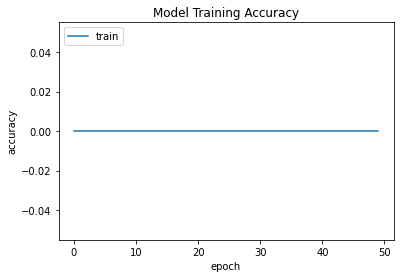

In [108]:
plt.plot(history.history['acc'])
plt.title('Model Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [109]:
#Evaluate the model
print(my_first_nn.evaluate(X_test, Y_test))

5/5 [==============================] - 0s 2ms/step - loss: -4920.1123 - acc: 0.0000e+00
[-4920.1123046875, 0.0]
